
<img src="https://www.virtualeducationexpo.ie/wp-content/uploads/2020/08/CCT_Logo_New_Aug_17.jpg" width="400">

# <center> *CA - Machine Learning for Business* <center>

## <center>Lecturer: Dr. Muhammad Iqbal  <center>

## <center>Students: Larcio Lima ID: 2022055 <center>
## <center> Lindon Soares ID 20220..<center>
## <center> Marilia Meneses da Silva ID 2022048 <center>
## <center> Raphael Fernandes ID 2022091 <center>

### <center>*ENEM Data Set*<center>
    
 

## Table of content

## Introduction

## Business Understanding

## Data Understanding

In [1]:
# Importing the libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score
import random
import math

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Reading the dataset
enem = pd.read_csv("enem_complete.csv")
enem.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


# EDA

# Data Preparation

In [3]:
# copying df
df_preparing = enem.copy()
df_preparing.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


In [4]:
# Dropping unnecessary columns
df_preparing.drop(["rank", "inep_code", 'school', 'city'], axis=1, inplace=True)
df_preparing.head(3)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,Minas Gerais,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


In [5]:
#designating the region of each state.

def sub(x):
    
    # North
    if x == 'Amazonas' or x =='Roraima' or x =='Amapá' or x =='Pará' or x =='Tocantins' or x =='Rondônia' or x =='Acre':
        return "North"
    
    # Northeast
    elif x == 'Maranhão' or x =='Piauí' or x =='Ceará' or x =='Pernambuco' or x =='Paraíba' or x =='Rio Grande do Norte' or x =='Sergipe' or x =='Alagoas' or x =='Bahia':
        return "Northeast"
    
    # Midwest
    elif x == 'Mato Grosso' or x =='Mato Grosso do Sul' or x =='Goiás':
        return "Midwest"
    
    
    # Southeast
    elif x == 'São Paulo' or x =='Minas Gerais' or x =='Rio de Janeiro' or x =='Espirito Santo':
        return "Southeast"
    
    # South
    elif x == 'Paraná' or x =='Rio Grande do Sul' or x =='Santa Catarina':
        return "South"
    
    elif x == 'Distrito Federal':
        return "Federal District"

In [6]:
df_preparing['region'] = df_preparing['state'].apply(lambda x: sub(x))

In [7]:
df_preparing

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast
2,Minas Gerais,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94,Southeast
3,São Paulo,Privada,Urbana,53,677.45,682.90,638.72,836.11,868.68,740.77,Southeast
4,Minas Gerais,Privada,Urbana,57,666.41,657.87,630.84,809.55,938.95,740.72,Southeast
...,...,...,...,...,...,...,...,...,...,...,...
19593,Tocantins,Estadual,Rural,10,423.49,412.24,386.12,449.16,284.00,391.00,North
19594,Maranhão,Estadual,Urbana,16,439.87,409.58,431.09,411.73,261.25,390.70,Northeast
19595,Amazonas,Estadual,Rural,56,422.24,407.61,411.16,425.47,241.79,381.65,North
19596,Amazonas,Estadual,Rural,21,432.40,405.50,377.89,441.75,154.29,362.36,North


In [8]:
df_preparing['region'].unique()

array(['Northeast', 'Southeast', 'Federal District', 'Midwest', 'North',
       'South'], dtype=object)

# Unsupervised Learning

In [9]:
df_preparing.head(2)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34,Northeast


In [10]:
df_school_type = df_preparing.drop(['state', 'location', 'average_exam', 'region'], axis = 1)
df_school_type.head(2)

,school_type,students,ch,cn,lc,mt,rd
0,Privada,35,692.85,674.50,652.24,845.89,935.43
1,Privada,33,695.67,676.34,652.91,836.65,915.15


In [11]:
plt.style.use('fivethirtyeight')

Ploting the Relation between the grades.

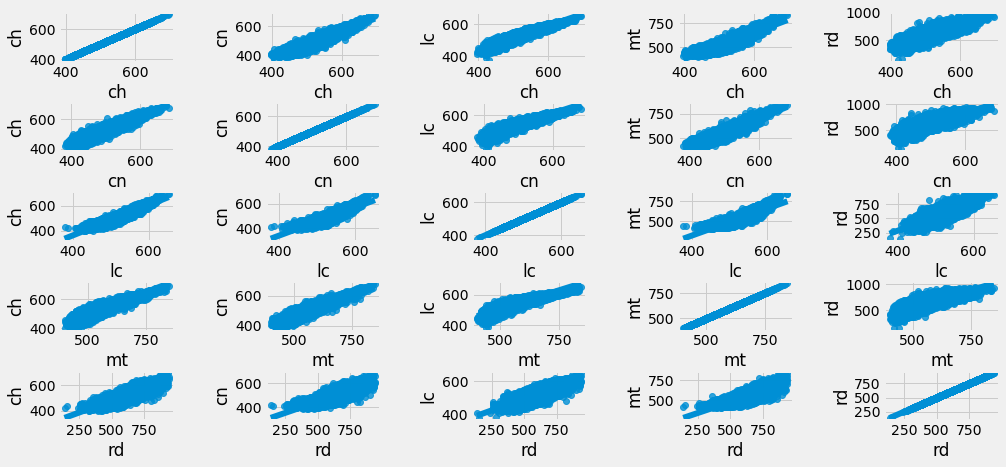

In [20]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['ch' , 'cn' , 'lc', 'mt', 'rd']:
    for y in ['ch' , 'cn' , 'lc', 'mt', 'rd']:
        n += 1
        plt.subplot(5 , 5 , n)
        plt.subplots_adjust(hspace = 0.8 , wspace = 0.8)
        sns.regplot(x = x , y = y , data = df_school_type)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()


In [13]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df_preparing, columns = ['school_type', 'location', 'region','state'])
df_encoded.head(3)

,students,ch,cn,lc,mt,rd,average_exam,school_type_Estadual,school_type_Federal,school_type_Municipal,...,state_Piauí,state_Rio Grande do Norte,state_Rio Grande do Sul,state_Rio de Janeiro,state_Rondônia,state_Roraima,state_Santa Catarina,state_Sergipe,state_São Paulo,state_Tocantins
0,35,692.85,674.50,652.24,845.89,935.43,760.18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,695.67,676.34,652.91,836.65,915.15,755.34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,280,681.58,668.20,634.47,823.80,906.64,742.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KMeans

In [17]:
from sklearn.cluster import KMeans

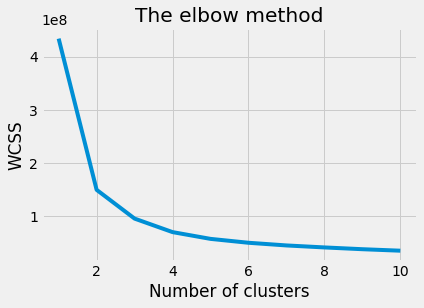

In [18]:
# Load 5 columns
x = df_school_type.iloc[:, [2, 3, 4,5, 6]].values

wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(x)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [21]:
df_cluster_KMeans = df_school_type.drop('school_type', axis = 1)
df_cluster_KMeans

,students,ch,cn,lc,mt,rd
0,35,692.85,674.50,652.24,845.89,935.43
1,33,695.67,676.34,652.91,836.65,915.15
2,280,681.58,668.20,634.47,823.80,906.64
3,53,677.45,682.90,638.72,836.11,868.68
4,57,666.41,657.87,630.84,809.55,938.95
...,...,...,...,...,...,...
19593,10,423.49,412.24,386.12,449.16,284.00
19594,16,439.87,409.58,431.09,411.73,261.25
19595,56,422.24,407.61,411.16,425.47,241.79
19596,21,432.40,405.50,377.89,441.75,154.29


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.fit(df_cluster_KMeans)

In [ ]:
kmeans.labels_

In [ ]:
df_school_type['cluster_KMeans'] = kmeans.labels_

In [ ]:
df_school_type

# KMedoids

In [ ]:
df_cluster_KMedoid = df_school_type.drop(['school_type', 'cluster_KMeans'], axis = 1)
df_cluster_KMedoid

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(df_cluster_KMedoid)

In [ ]:
kmedoids.labels_

In [ ]:
df_school_type['cluster_KMedoids'] = kmedoids.labels_
df_school_type

# Comparinng

### Original

In [ ]:
df_school_type = df_school_type.reindex(['students', 'ch', 'cn', 'lc', 'mt', 'rd', 'school_type', 'cluster_KMeans', 'cluster_KMedoids' ], axis=1)

In [ ]:
df_school_type.head(2)

In [ ]:
sns.pairplot(df_school_type, hue='school_type')

### KMeans

In [ ]:
sns.pairplot(df_school_type, hue='cluster_KMeans')

### KMedoid

In [ ]:
sns.pairplot(df_school_type, hue='cluster_KMedoids')

# Supervised Learning

### Encoding

In [ ]:
df_preparing.head(2)

In [ ]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df_preparing, columns = ['school_type', 'location', 'region'])
df_encoded.head(3)

In [ ]:
df_encoded = df_encoded.drop(['state', 'average_exam'], axis=1)

### Correlation Analysis

In [ ]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_preparing.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - Entire dataset')

In [ ]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_encoded.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - Entire dataset')

# Models

In [ ]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
X = df_encoded.drop('rd', axis=1)
y = df_encoded['rd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)




In [ ]:
X_train

In [ ]:
# X_train= X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression


# Training the model on the Training set
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

### Precision

In [ ]:
# Precision of the model - Train set
print('The precision of the model is ')
print(regressor_LR.score(X_train, y_train))

In [ ]:
# Precision of the model - Test set
y_pred = regressor_LR.predict(X_test)

R_square = r2_score(y_test,y_pred) 
print('Coefficient of Determination', R_square)